<a href="https://colab.research.google.com/github/EricLe1404/text_analyse_tool/blob/main/Text_Analyse_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 👋 Welcome to the Text Insight Tool!

Choose input method:
1. Type or paste text
2. Upload a text file
Enter 1 or 2: 2


Saving sample_text_for_analysis.txt to sample_text_for_analysis.txt

--- Optional Feature Toggles ---
Enable spelling check? (y/n): y
Enable auto-correction? (y/n): y
Enable formality detection? (y/n): y
Enable sentiment analysis? (y/n): y



# 🧾 Summary Dashboard

## 📊 Text Statistics
- **Total Words**: 36
- **Unique Words**: 36
- **Sentences**: 4
- **Average Word Length**: 8.50

## 💬 Language & Style
- **Language**: en
- **Formality**: Neutral
- **Spelling Issues**: AI-powered, professionals., AI

## 😊 Sentiment
- **Sentiment**: Negative 😞
- **Polarity Score**: -0.08
- **Subjectivity**: 0.32

## 🔍 Top Words
- todays (1), fastpaced (1), digital (1), world (1), artificial (1)


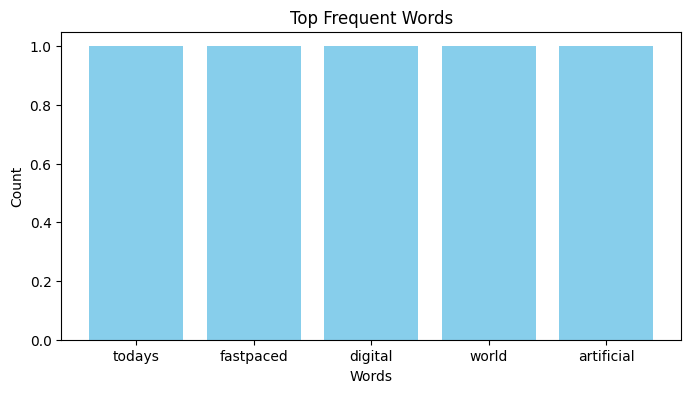


--- Additional Charts ---



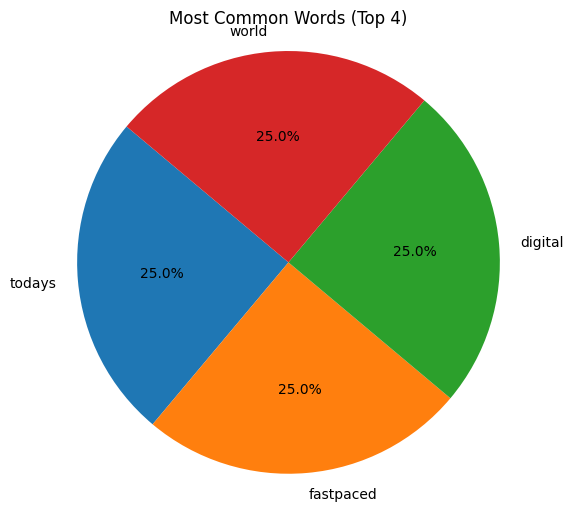

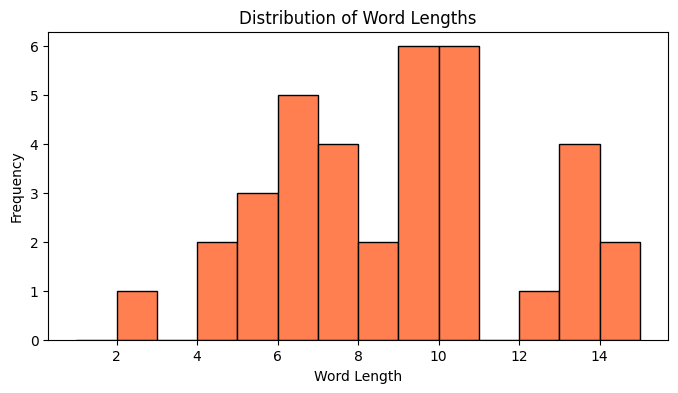


--- Word Cloud ---



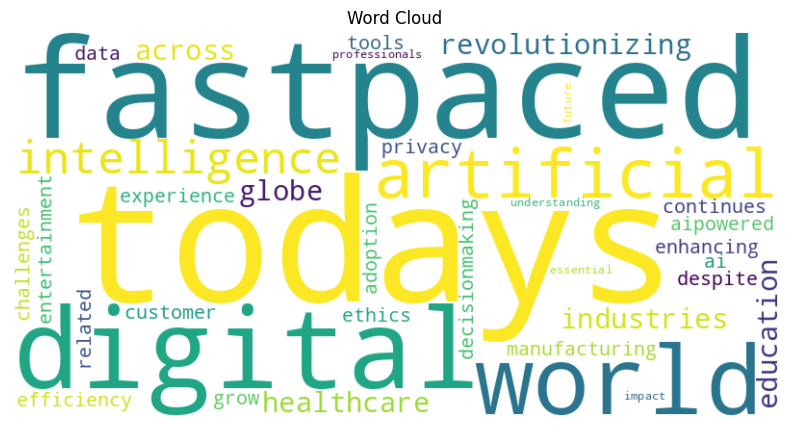

In [28]:
# 📘 Text Analysis Tool - Complete Python Code

# Section 1: Imports and Setup
import nltk
import string
import re
import random
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from langdetect import detect
from IPython.display import display, Markdown
import warnings
from google.colab import files
import io

nltk.download('punkt')
nltk.download('stopwords')

# Section 2: Input Handling
def get_user_input():
    display(Markdown("## 👋 Welcome to the Text Insight Tool!"))
    print("Choose input method:")
    print("1. Type or paste text")
    print("2. Upload a text file")
    method = input("Enter 1 or 2: ")

    if method == '1':
        text = input("\nPlease paste your text below:\n")
    elif method == '2':
        uploaded = files.upload()
        if not uploaded:
            print("⚠️ No file uploaded.")
            return None, None, None, None
        file = next(iter(uploaded.values()))
        try:
            text = io.StringIO(file.decode('utf-8')).read()
        except:
            print("❗️ Invalid or unreadable text file.")
            return None, None, None, None
    else:
        print("⚠️ Invalid input choice.")
        return None, None, None, None

    words = nltk.word_tokenize(text)
    if len(words) < 10:
        print("⚠️ Please enter at least 10 words to proceed with analysis.")
        return None, None, None, None, None, None, None


    if not text.strip():
        print("⚠️ No input detected. Please enter or upload text.")
        return None, None, None, None

    print("\n--- Optional Feature Toggles ---")
    enable_spelling = input("Enable spelling check? (y/n): ").lower() == 'y'
    auto_correct = input("Enable auto-correction? (y/n): ").lower() == 'y'
    enable_formality = input("Enable formality detection? (y/n): ").lower() == 'y'
    enable_sentiment = input("Enable sentiment analysis? (y/n): ").lower() == 'y'

    return text, enable_spelling, auto_correct, enable_formality, enable_sentiment

# Section 3: Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[' + string.punctuation + ']', '', text)
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    personal_pronouns = {"i", "me", "my", "mine", "we", "us", "our", "ours"}
    words = [word for word in words if word not in stop_words and word not in personal_pronouns]
    return words

# Section 4: Spelling
def check_spelling(text):
    blob = TextBlob(text)
    corrected = str(blob.correct())
    original_words = set(text.split())
    corrected_words = set(corrected.split())
    misspelled = original_words - corrected_words
    return corrected, list(misspelled)

# Section 5: Stats
def get_statistics(words, text):
    total_words = len(words)
    unique_words = len(set(words))
    sentence_count = len(nltk.sent_tokenize(text))
    avg_word_length = sum(len(word) for word in words) / total_words
    word_freq = Counter(words).most_common(5)
    return total_words, unique_words, sentence_count, avg_word_length, word_freq

# Section 6: Language, Formality, Sentiment
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

def detect_formality(text):
    informal_words = ["lol", "btw", "gonna", "wanna", "u", "idk", "bro", "dunno"]
    contractions = ["don't", "can't", "i'm", "you're", "won't"]
    text_lower = text.lower()
    found = sum(word in text_lower for word in informal_words + contractions)
    if found >= 3:
        return "Informal"
    elif found == 0:
        return "Formal"
    else:
        return "Neutral"

def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        sentiment = "Positive 😊"
    elif polarity < -0.05:
        sentiment = "Negative 😞"
    else:
        sentiment = "Neutral 😐"
    return sentiment, polarity, blob.sentiment.subjectivity

# Section 7: Visuals
def generate_bar_chart(word_freq):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.show()

def generate_wordcloud(words):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

def generate_random_extra_charts(words):
    choices = ["line", "pie", "hist"]
    selected = random.sample(choices, k=2)

    if "line" in selected:
        plt.figure(figsize=(8, 4))
        plt.plot(range(len(words[:10])), [len(w) for w in words[:10]], marker='o')
        plt.title("Length of First 10 Words")
        plt.xlabel("Word Position")
        plt.ylabel("Word Length")
        plt.grid(True)
        plt.show()

    if "pie" in selected:
        freq = Counter(words).most_common(4)
        labels, sizes = zip(*freq)
        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title("Most Common Words (Top 4)")
        plt.show()

    if "hist" in selected:
        lengths = [len(w) for w in words]
        plt.figure(figsize=(8, 4))
        plt.hist(lengths, bins=range(1, max(lengths)+1), color='coral', edgecolor='black')
        plt.title("Distribution of Word Lengths")
        plt.xlabel("Word Length")
        plt.ylabel("Frequency")
        plt.show()

# Section 8: Summary
def display_summary(total_words, unique_words, sentence_count, avg_word_length,
                    lang, formality, spelling_issues, sentiment, polarity, subjectivity, word_freq):
    display(Markdown(f"""
# 🧾 Summary Dashboard

## 📊 Text Statistics
- **Total Words**: {total_words}
- **Unique Words**: {unique_words}
- **Sentences**: {sentence_count}
- **Average Word Length**: {avg_word_length:.2f}

## 💬 Language & Style
- **Language**: {lang}
- **Formality**: {formality}
- **Spelling Issues**: {', '.join(spelling_issues) if spelling_issues else 'None'}

## 😊 Sentiment
- **Sentiment**: {sentiment}
- **Polarity Score**: {polarity:.2f}
- **Subjectivity**: {subjectivity:.2f}

## 🔍 Top Words
- {', '.join([f'{w} ({c})' for w, c in word_freq])}
"""))

# Section 9: Main Runner
def run_text_analysis():
    user_input = get_user_input()
    if not user_input or any(v is None for v in user_input):
        return

    text, enable_spelling, auto_correct, enable_formality, enable_sentiment = user_input
    words = clean_text(text)

    if enable_spelling:
        corrected_text, spelling_issues = check_spelling(text)
        if auto_correct:
            text = corrected_text
    else:
        spelling_issues = []

    total_words, unique_words, sentence_count, avg_word_length, word_freq = get_statistics(words, text)
    lang = detect_language(text)
    formality = detect_formality(text) if enable_formality else 'N/A'
    sentiment, polarity, subjectivity = analyze_sentiment(text) if enable_sentiment else ('N/A', 0.0, 0.0)

    display_summary(total_words, unique_words, sentence_count, avg_word_length,
                    lang, formality, spelling_issues, sentiment, polarity, subjectivity, word_freq)

    generate_bar_chart(word_freq)
    print("\n--- Additional Charts ---\n")
    generate_random_extra_charts(words)
    print("\n--- Word Cloud ---\n")
    generate_wordcloud(words)

# Run the tool
run_text_analysis()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 👋 Welcome to the Text Insight Tool!

Choose input method:
1. Type or paste text
2. Upload a text file
Enter 1 or 2: 1

Please paste your text below:
我们正在研究自然语言处理和人工智能，这些技术在大数据和深度学习的支持下变得越来越强大。未来，大模型可能会彻底改变我们的生活方式。

--- Optional Feature Toggles ---
Enable spelling check? (y/n): y
Enable auto-correction? (y/n): y
Enable formality detection? (y/n): y
Enable sentiment analysis? (y/n): y



# 🧾 Summary Dashboard

## 📊 Text Statistics
- **Total Words**: 31
- **Unique Words**: 26
- **Sentences**: 1
- **Average Word Length**: 2.06

## 💬 Language & Style
- **Language**: zh-cn
- **Formality**: Formal
- **Spelling Issues**: 我们正在研究自然语言处理和人工智能，这些技术在大数据和深度学习的支持下变得越来越强大。未来，大模型可能会彻底改变我们的生活方式。

## 😊 Sentiment
- **Sentiment**: Neutral 😐
- **Polarity Score**: 0.00
- **Subjectivity**: 0.00

## 🔍 Top Words
- 我们 (2), 和 (2), ， (2), 的 (2), 。 (2)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20204 (\N{CJK UNIFIED IDEOGRAPH-4EEC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

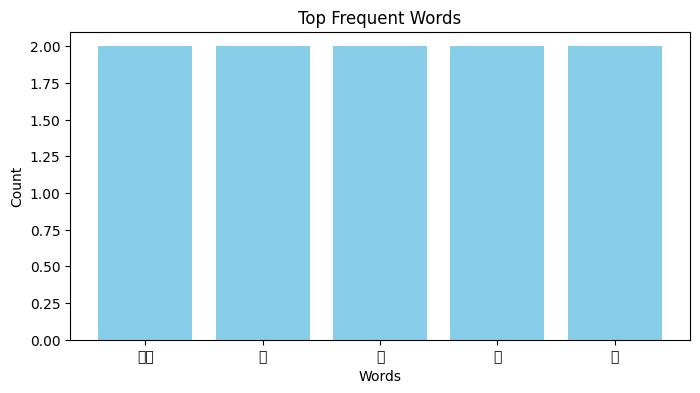


--- Additional Charts ---



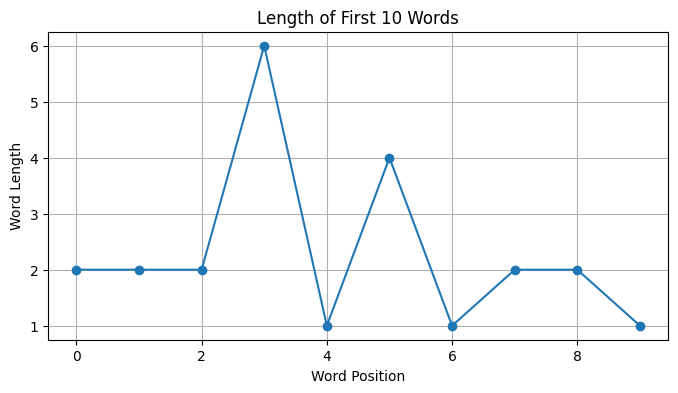

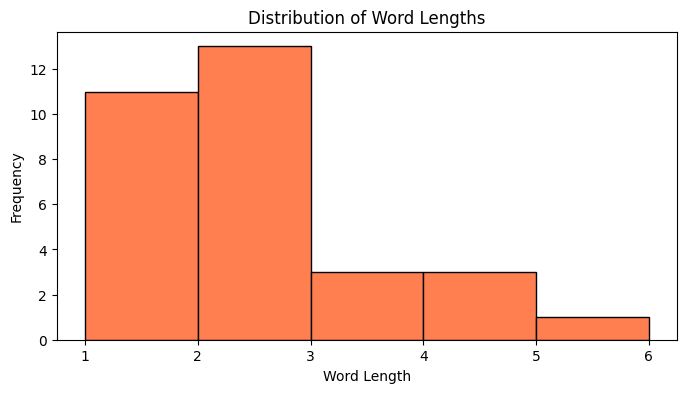


--- Word Cloud ---



OSError: cannot open resource

In [25]:
# 📘 Text Analysis Tool - Complete Python Code

# Section 1: Imports and Setup
import nltk
import string
import re
import random
import jieba
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from langdetect import detect
from IPython.display import display, Markdown
import warnings
from google.colab import files
import io

nltk.download('punkt')
nltk.download('stopwords')

# Load extended Chinese dictionary for jieba
jieba.load_userdict(io.StringIO("""
自然语言处理
人工智能
机器学习
大数据
深度学习
大模型
"""))

# Section 2: Input Handling
def get_user_input():
    display(Markdown("## 👋 Welcome to the Text Insight Tool!"))
    print("Choose input method:")
    print("1. Type or paste text")
    print("2. Upload a text file")
    method = input("Enter 1 or 2: ")

    if method == '1':
        text = input("\nPlease paste your text below:\n")
    elif method == '2':
        uploaded = files.upload()
        if not uploaded:
            print("⚠️ No file uploaded.")
            return None, None, None, None
        file = next(iter(uploaded.values()))
        try:
            text = io.StringIO(file.decode('utf-8')).read()
        except:
            print("❗️ Invalid or unreadable text file.")
            return None, None, None, None
    else:
        print("⚠️ Invalid input choice.")
        return None, None, None, None

    if not text.strip():
        print("⚠️ No input detected. Please enter or upload text.")
        return None, None, None, None

    print("\n--- Optional Feature Toggles ---")
    enable_spelling = input("Enable spelling check? (y/n): ").lower() == 'y'
    auto_correct = input("Enable auto-correction? (y/n): ").lower() == 'y'
    enable_formality = input("Enable formality detection? (y/n): ").lower() == 'y'
    enable_sentiment = input("Enable sentiment analysis? (y/n): ").lower() == 'y'

    return text, enable_spelling, auto_correct, enable_formality, enable_sentiment

# Section 3: Clean Text
def clean_text(text):
    lang = detect(text)
    if lang.startswith('zh'):
        words = list(jieba.cut(text))
    else:
        text = text.lower()
        text = re.sub(r'[' + string.punctuation + ']', '', text)
        words = nltk.word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        personal_pronouns = {"i", "me", "my", "mine", "we", "us", "our", "ours"}
        words = [word for word in words if word not in stop_words and word not in personal_pronouns]
    return words

# Section 4: Spelling
def check_spelling(text):
    blob = TextBlob(text)
    corrected = str(blob.correct())
    original_words = set(text.split())
    corrected_words = set(corrected.split())
    misspelled = original_words - corrected_words
    return corrected, list(misspelled)

# Section 5: Stats
def get_statistics(words, text):
    total_words = len(words)
    unique_words = len(set(words))
    sentence_count = len(nltk.sent_tokenize(text))
    avg_word_length = sum(len(word) for word in words) / total_words
    word_freq = Counter(words).most_common(5)
    return total_words, unique_words, sentence_count, avg_word_length, word_freq

# Section 6: Language, Formality, Sentiment
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

def detect_formality(text):
    informal_words = ["lol", "btw", "gonna", "wanna", "u", "idk", "bro", "dunno"]
    contractions = ["don't", "can't", "i'm", "you're", "won't"]
    text_lower = text.lower()
    found = sum(word in text_lower for word in informal_words + contractions)
    if found >= 3:
        return "Informal"
    elif found == 0:
        return "Formal"
    else:
        return "Neutral"

def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        sentiment = "Positive 😊"
    elif polarity < -0.05:
        sentiment = "Negative 😞"
    else:
        sentiment = "Neutral 😐"
    return sentiment, polarity, blob.sentiment.subjectivity

# Section 7: Visuals
def generate_bar_chart(word_freq):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.show()

def generate_wordcloud(words):
    wc = WordCloud(width=800, height=400, font_path="SimHei.ttf", background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

def generate_random_extra_charts(words):
    choices = ["line", "pie", "hist"]
    selected = random.sample(choices, k=2)

    if "line" in selected:
        plt.figure(figsize=(8, 4))
        plt.plot(range(len(words[:10])), [len(w) for w in words[:10]], marker='o')
        plt.title("Length of First 10 Words")
        plt.xlabel("Word Position")
        plt.ylabel("Word Length")
        plt.grid(True)
        plt.show()

    if "pie" in selected:
        freq = Counter(words).most_common(4)
        labels, sizes = zip(*freq)
        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.title("Most Common Words (Top 4)")
        plt.show()

    if "hist" in selected:
        lengths = [len(w) for w in words]
        plt.figure(figsize=(8, 4))
        plt.hist(lengths, bins=range(1, max(lengths)+1), color='coral', edgecolor='black')
        plt.title("Distribution of Word Lengths")
        plt.xlabel("Word Length")
        plt.ylabel("Frequency")
        plt.show()

# Section 8: Summary
def display_summary(total_words, unique_words, sentence_count, avg_word_length,
                    lang, formality, spelling_issues, sentiment, polarity, subjectivity, word_freq):
    display(Markdown(f"""
# 🧾 Summary Dashboard

## 📊 Text Statistics
- **Total Words**: {total_words}
- **Unique Words**: {unique_words}
- **Sentences**: {sentence_count}
- **Average Word Length**: {avg_word_length:.2f}

## 💬 Language & Style
- **Language**: {lang}
- **Formality**: {formality}
- **Spelling Issues**: {', '.join(spelling_issues) if spelling_issues else 'None'}

## 😊 Sentiment
- **Sentiment**: {sentiment}
- **Polarity Score**: {polarity:.2f}
- **Subjectivity**: {subjectivity:.2f}

## 🔍 Top Words
- {', '.join([f'{w} ({c})' for w, c in word_freq])}
"""))

# Section 9: Main Runner
def run_text_analysis():
    user_input = get_user_input()
    if not user_input or any(v is None for v in user_input):
        return

    text, enable_spelling, auto_correct, enable_formality, enable_sentiment = user_input
    words = clean_text(text)

    if enable_spelling:
        corrected_text, spelling_issues = check_spelling(text)
        if auto_correct:
            text = corrected_text
    else:
        spelling_issues = []

    total_words, unique_words, sentence_count, avg_word_length, word_freq = get_statistics(words, text)
    lang = detect_language(text)
    formality = detect_formality(text) if enable_formality else 'N/A'
    sentiment, polarity, subjectivity = analyze_sentiment(text) if enable_sentiment else ('N/A', 0.0, 0.0)

    display_summary(total_words, unique_words, sentence_count, avg_word_length,
                    lang, formality, spelling_issues, sentiment, polarity, subjectivity, word_freq)

    generate_bar_chart(word_freq)
    print("\n--- Additional Charts ---\n")
    generate_random_extra_charts(words)
    print("\n--- Word Cloud ---\n")
    generate_wordcloud(words)

# Run the tool
run_text_analysis()


In [19]:
# 📘 Text Analysis Tool - Initial Structure (Based on Full Pseudocode)

# Section 1: Imports and Setup
import nltk
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from langdetect import detect
from IPython.display import display, Markdown
import warnings



# Section 2: Welcome and Input Handling
def get_user_input():
    display(Markdown("## 👋 Welcome to the Text Insight Tool!"))
    print("Choose input method:")
    print("1. Type or paste text")
    print("2. Upload a text file")
    method = input("Enter 1 or 2: ")

    if method == '1':
        text = input("\nPlease paste your text below:\n")
    elif method == '2':
        uploaded = files.upload()
        if not uploaded:
            print("⚠️ No file uploaded.")
            return None, None, None, None, None, None, None
        file = next(iter(uploaded.values()))
        try:
            text = io.StringIO(file.decode('utf-8')).read()
        except:
            print("❗️ Invalid or unreadable text file.")
            return None, None, None, None, None, None, None
    else:
        print("⚠️ Invalid input choice.")
        return None, None, None, None, None, None, None

    if not text.strip():
        print("⚠️ No input detected. Please enter or upload text.")
        return None, None, None, None, None, None, None

    words = nltk.word_tokenize(text)
    if len(words) < 10:
        print("⚠️ Please enter at least 10 words to proceed with analysis.")
        return None, None, None, None, None, None, None

    # Feature toggles
    print("\n--- Optional Feature Toggles ---")
    enable_spelling = input("Enable spelling check? (y/n): ").lower() == 'y'
    auto_correct = input("Enable auto-correction? (y/n): ").lower() == 'y'
    enable_formality = input("Enable formality detection? (y/n): ").lower() == 'y'
    enable_sentiment = input("Enable sentiment analysis? (y/n): ").lower() == 'y'
    enable_visuals = input("Enable visualizations? (y/n): ").lower() == 'y'
    enable_summary = input("Generate summary dashboard? (y/n): ").lower() == 'y'

    return text, enable_spelling, auto_correct, enable_formality, enable_sentiment, enable_visuals, enable_summary


# Section 3: Text Cleaning and Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[' + string.punctuation + ']', '', text)
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Section 4: Spelling Correction and Highlighting
def check_spelling(text):
    blob = TextBlob(text)
    corrected = str(blob.correct())
    original_words = set(text.split())
    corrected_words = set(corrected.split())
    misspelled = original_words - corrected_words
    return corrected, list(misspelled)

# Section 5: Basic Statistics
def get_statistics(words, text):
    total_words = len(words)
    unique_words = len(set(words))
    sentence_count = len(nltk.sent_tokenize(text))
    avg_word_length = sum(len(word) for word in words) / total_words
    word_freq = Counter(words).most_common(5)
    return total_words, unique_words, sentence_count, avg_word_length, word_freq

# Section 6: Language Detection
def detect_language(text):
    try:
        lang_code = detect(text)
        return lang_code
    except:
        return "unknown"

# Section 7: Formality Detection (Rule-based)
def detect_formality(text):
    informal_words = ["lol", "btw", "gonna", "wanna", "u", "idk", "bro", "dunno"]
    contractions = ["don't", "can't", "i'm", "you're", "won't"]
    text_lower = text.lower()
    found = sum(word in text_lower for word in informal_words + contractions)
    if found >= 3:
        return "Informal"
    elif found == 0:
        return "Formal"
    else:
        return "Neutral"

# Section 8: Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.05:
        sentiment = "Positive 😊"
    elif polarity < -0.05:
        sentiment = "Negative 😞"
    else:
        sentiment = "Neutral 😐"
    return sentiment, polarity, blob.sentiment.subjectivity

# Section 9: Visualizations
def generate_wordcloud(words):
    wc = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

def generate_bar_chart(word_freq):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(8, 4))
    plt.bar(words, counts, color='skyblue')
    plt.title("Top Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.show()

# Section 10: Summary Dashboard
def display_summary(total_words, unique_words, sentence_count, avg_word_length,
                    lang, formality, spelling_issues, sentiment, polarity, subjectivity, word_freq):
    display(Markdown(f"""
# 🧾 Summary Dashboard

## 📊 Text Statistics
- **Total Words**: {total_words}
- **Unique Words**: {unique_words}
- **Sentences**: {sentence_count}
- **Average Word Length**: {avg_word_length:.2f}

## 💬 Language & Style
- **Language**: {lang}
- **Formality**: {formality}
- **Spelling Issues**: {', '.join(spelling_issues) if spelling_issues else 'None'}

## 😊 Sentiment
- **Sentiment**: {sentiment}
- **Polarity Score**: {polarity:.2f}
- **Subjectivity**: {subjectivity:.2f}

## 🔍 Top Words
- {', '.join([f'{w} ({c})' for w, c in word_freq])}
"""))

# Entry Point
def run_text_analysis():
    text = get_user_input()
    if not text:
        return

    words = clean_text(text)
    corrected_text, spelling_issues = check_spelling(text)
    total_words, unique_words, sentence_count, avg_word_length, word_freq = get_statistics(words, text)
    lang = detect_language(text)
    formality = detect_formality(text)
    sentiment, polarity, subjectivity = analyze_sentiment(text)

    display_summary(total_words, unique_words, sentence_count, avg_word_length,
                    lang, formality, spelling_issues, sentiment, polarity, subjectivity, word_freq)

    generate_bar_chart(word_freq)
    generate_wordcloud(words)

# Run the tool
run_text_analysis()


## 👋 Welcome to the Text Insight Tool!

Choose input method:
1. Type or paste text
2. Upload a text file
Enter 1 or 2: 1

Please paste your text below:
我们正在研究自然语言处理和人工智能，这些技术在大数据和深度学习的支持下变得越来越强大。未来，大模型可能会彻底改变我们的生活方式。
⚠️ Please enter at least 10 words to proceed with analysis.


AttributeError: 'tuple' object has no attribute 'lower'

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
Display welcome message to the user
Prompt user to:
    - Type or paste text
    - OR upload a text/document file
    - (Optional) Provide second text for comparison

If user uploads a file:
    - Extract text from file (.txt, .pdf, .docx, .csv)

If user enters URL:
    - Scrape text content from webpage

Store text(s) for analysis

Ask user to enable/disable optional features:
    - Spelling check
    - Auto-correction
    - Formality detection
    - Sentiment analysis
    - Word cloud and charts
    - Summary dashboard
    - Comparison mode

Clean the input text(s):
    - Lowercase
    - Remove punctuation
    - Tokenize text
    - Remove stopwords

If spelling check is enabled:
    - Highlight misspelled words
    - Apply auto-correction (if selected)

For each input text:
    - Count total words
    - Count unique words
    - Count sentences
    - Calculate average word length
    - Identify most frequent words

Detect language using langdetect
Detect formality based on informal words, contractions, and emojis
Perform sentiment analysis (TextBlob or VADER)
    - Return polarity score and emoji


If visualizations enabled:
    - Generate word cloud
    - Generate bar chart of word frequency
    - (Optional) Generate pie chart of sentiment

Compile results into a summary:
    - Key statistics
    - Tone and formality feedback
    - Detected language
    - Most frequent words
    - Suggestions for improvement

Display option to:
    - Copy to clipboard
    - Download PDF
    - Save to history

Offer options:
    - Analyze another text
    - Compare with a second text
    - Exit program


In [ ]:
1. Initalize and Welcome the user

Display welcome message: "Welcome to the Text Insight Tool!"

Prompt user to input text via:
    - Typing or pasting into a text box
    - Uploading a file (.txt, .docx, .pdf, .csv)
    - (Optional) Entering a URL
    - (Optional) Using speech-to-text
    - (Optional) Monitoring clipboard

IF user uploads a file:
    - Validate file type and check content
    - IF file is unsupported or empty:
        - Display warning: "❗ Invalid or empty file. Please upload a valid text file."
        - Return to input step

IF no text is entered after any method:
    - Display warning: "⚠️ No input detected. Please enter or upload text before proceeding."
    - Return to input step

Store input text as `text_1`

IF text_1 contains fewer than 10 words:
    - Display warning: "⚠️ Please enter at least 10 words to begin analysis."
    - Return to input step

IF user selects comparison:
    - Prompt for second input (`text_2`)
    - Run same validations for `text_2`


 2. Show Feature Toggles
Present toggles for the following options:
    [x] Enable spelling check
    [x] Show auto-correction
    [x] Enable formality detection
    [x] Enable sentiment analysis
    [x] Generate visualizations
    [x] Generate summary dashboard
    [x] Enable text comparison (for two texts)

Store toggle preferences

3. Preprocess the Input Text
For each input text:
    - Convert to lowercase
    - Remove punctuation
    - Tokenize words
    - Remove stopwords

If spelling check is enabled:
    - Identify misspelled words using TextBlob or dictionary
    - If auto-correction enabled:
        - Replace misspelled words with corrected versions

4. Calculate Statistics
For each text:
    - Count total words
    - Count unique words
    - Count total sentences
    - Calculate average word length
    - Identify top N frequent words using Counter

5. Analyze Language, Style, For each text:
    - Detect language using langdetect or TextBlob
    - Detect formality:
        - Check for slang, contractions, emojis
        - Classify as formal, informal, or neutral
    - Perform sentiment analysis using TextBlob or VADER:
        - Get polarity and subjectivity scores
        - Classify as Positive / Neutral / Negative
        - Add emoji feedback (😊 😐 😞)

6.  Create Visualizations
If visualizations enabled:
    - Generate bar chart for top N frequent words
    - Generate word cloud for whole text
    - (Optional) Generate pie chart for sentiment proportions

7.  Generate Summary Dashboard
For each text:
    - Combine all stats and analysis
    - Display as a formatted markdown-style dashboard:
        - Key metrics
        - Sentiment summary
        - Language/formality/spelling results
        - Frequent/overused words
        - Suggestions for improvement

Allow options to:
    - Download summary as PDF
    - Copy summary to clipboard
    - Save snapshot to "history"
8. Handle Navigation & User Flow

Ask user:
    - [Run again] Analyze another text
    - [Compare] Show side-by-side comparison (if two texts)
    - [Exit] End the session

9. Prompting Journal (Background Logging)
Log AI-assisted tasks throughout the project:
    - Prompt → Response → Revision → Final implementation
    - Save entries with timestamps and section tags
    - Store in markdown or text file for submission/reporting




In [ ]:
analyzer = SentimentIntensityAnalyzer()

text = "I love this! It's absolutely fantastic 😊"

scores = analyzer.polarity_scores(text)
print(scores)
compound = scores['compound']

if compound >= 0.05:
    print("Sentiment: Positive 😊")
elif compound <= -0.05:
    print("Sentiment: Negative 😞")
else:
    print("Sentiment: Neutral 😐")


{'neg': 0.0, 'neu': 0.264, 'pos': 0.736, 'compound': 0.855}
Sentiment: Positive 😊


In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
try:
    import streamlit
    print("streamlit is already installed.")
except ImportError:
    print("streamlit is not installed.")

streamlit is not installed.


In [ ]:
try:
    import matplotlib
    print("matplotlib is already installed.")
except ImportError:
    print("matplotlib is not installed.")


matplotlib is already installed.


In [ ]:
try:
    import re
    print("re is already installed.")
except ImportError:
    print("re is not installed.")


re is already installed.


In [ ]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
try:
    import textblob
    print("textblob is already installed.")
except ImportError:
    print("textblob is not installed.")


textblob is already installed.


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
try:
    import nltk
    print("nltk is already installed.")
except ImportError:
    print("nltk is not installed.")


nltk is already installed.
